In [116]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import math
from scipy.stats import poisson

In [117]:
#Read in data accepting rides vs price data
data = pd.read_excel(r'driverAcceptanceData.xlsx')

In [118]:
#Setting x and y for logistic regression
y = data['ACCEPTED'].to_numpy()
x = data['PAY'].to_numpy().reshape(-1,1)

In [119]:
#Logistic regression model
model = LogisticRegression(solver='liblinear', C=10,random_state=0)

In [120]:
#Fitting model
model.fit(x,y)

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [121]:
#B0/A coefficient for binary logistical regression
model.intercept_

array([-6.21328876])

In [122]:
#B1/B coefficient for binary logistical regression
model.coef_

array([[0.24997373]])

In [123]:
#P values per price (x values)
model.predict_proba(x)

array([[0.24496974, 0.75503026],
       [0.6147163 , 0.3852837 ],
       [0.84666435, 0.15333565],
       ...,
       [0.01317533, 0.98682467],
       [0.97069042, 0.02930958],
       [0.6539032 , 0.3460968 ]])

In [124]:
#Prediction if driver will accept ride based on probability from x values
model.predict(x)

array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [125]:
#How close the model was to predicting the correct driver outcome
model.score(x,y)

0.833

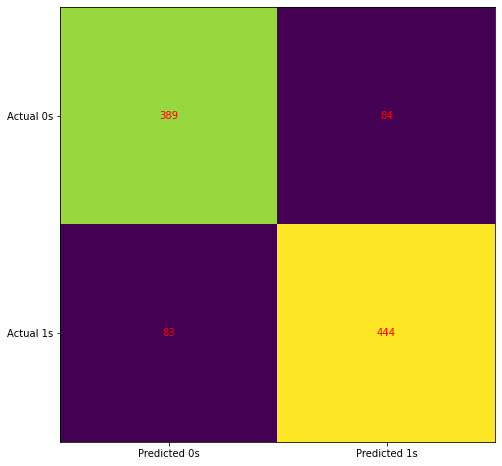

In [126]:
#Showing confusion matrix of negatives and positives of model vs actual data
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j],ha='center', va='center', color='red')
plt.show()

In [127]:
#Classification report from model
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       473
         1.0       0.84      0.84      0.84       527

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



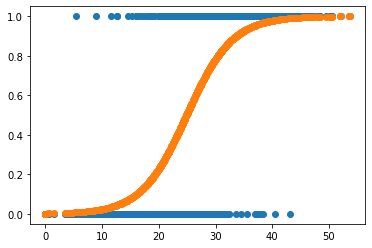

In [128]:
#Sketch of driver accept or reject data with probability data per price
plt.scatter(x,y)
plt.scatter(x,model.predict_proba(x)[:,1:].flatten())

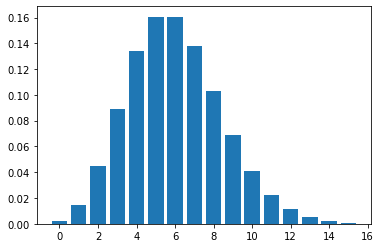

In [129]:
#Illustration of Poisson distribution
x = np.arange(0, 16, 1)
y = poisson.pmf(x, mu=6)
plt.bar(x, y)
plt.show()

In [153]:
#Ideal probability for driver to accept ride
P_ideal = 0.5
#Cost to acquire rider
price_to_acquire = 30
#Fixed price to charge rider
ride_cost = 30
#Calculation of what the driver should be paid for the ideal probability
D_pay_ideal = (np.log(P_ideal/(1-P_ideal)) - model.intercept_)/model.coef_
D_pay_ideal = D_pay_ideal[0,0]
D_pay_ideal

24.855766626835674

In [154]:
#Input of how many riders we want to acquire in month 1
month_1_acq = 1000

In [155]:
#Calculating the number of customers per rides called and successful hails
d = []
lambda_1 = 1
lambda_1_range = 7
for i in range (lambda_1_range):
    for j in range (i+1):
        d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_1_acq*(poisson.pmf(np.arange(0,lambda_1_range,1), mu=lambda_1)[i]))
            }
        )
        
month_1 = pd.DataFrame(d)       
month_1       

,Rides_called,Successful_calls,Nr_customers
0,0,0,367.879441
1,1,0,183.939721
2,1,1,183.939721
3,2,0,45.984930
4,2,1,91.969860
5,2,2,45.984930
6,3,0,7.664155
7,3,1,22.992465
8,3,2,22.992465
9,3,3,7.664155


In [156]:
#Grouping and summing customers according to how many rides they successfully hailed

#Should I set it to when customers > 1?

month_1_outcome = month_1.iloc[:,1:].groupby('Successful_calls').sum()
month_1_outcome = month_1_outcome.reset_index()
month_1_outcome

,Successful_calls,Nr_customers
0,0,606.530052
1,1,303.261034
2,2,75.803283
3,3,12.613922
4,4,1.556781
5,5,0.143703
6,6,0.007983


In [157]:
#Calculating month 1 income, expense to pay driver and expense to acquire new customers

month_1_outcome["income"] = month_1_outcome["Successful_calls"]*month_1_outcome["Nr_customers"]*(ride_cost)
month_1_outcome["expense_drivers"] = month_1_outcome["Successful_calls"]*month_1_outcome["Nr_customers"]*(D_pay_ideal)
month_1_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,606.530052,0.000000,0.000000
1,1,303.261034,9097.831024,7537.785491
2,2,75.803283,4548.196997,3768.297438
3,3,12.613922,1135.252963,940.586090
4,4,1.556781,186.813779,154.779990
5,5,0.143703,21.555436,17.859230
6,6,0.007983,1.437029,1.190615


In [158]:
#Extracting number of customers per successful ride hails
month_2_input = month_1_outcome.iloc[:5, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_2_acq = 1000
#Adding new customers to existing data set at lambda = 1
month_2_input[1,1] = month_2_input[1,1] + month_2_acq
month_2_input

array([[0.00000000e+00, 6.06530052e+02],
       [1.00000000e+00, 1.30326103e+03],
       [2.00000000e+00, 7.58032833e+01],
       [3.00000000e+00, 1.26139218e+01],
       [4.00000000e+00, 1.55678149e+00]])

In [159]:
#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_2_input)):
    for i in range(5 + 2*month_2_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_2_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_2_input[k,0].astype(int),1), mu=month_2_input[k,0].astype(int))[i]))
            }
        )
            
month_2 = pd.DataFrame(d)       
month_2

,Rides_called,Successful_calls,Nr_customers
0,0,0,6.060000e+02
1,1,0,0.000000e+00
2,1,1,0.000000e+00
3,2,0,0.000000e+00
4,2,1,0.000000e+00
...,...,...,...
240,12,8,7.752651e-05
241,12,9,3.445623e-05
242,12,10,1.033687e-05
243,12,11,1.879431e-06


In [160]:
#Grouping and summing customers according to how many rides they successfully hailed
month_2_outcome = month_2.iloc[:,1:].groupby('Successful_calls').sum()
month_2_outcome = month_2_outcome.reset_index()
month_2_outcome

,Successful_calls,Nr_customers
0,0,1.426712e+03
1,1,4.270268e+02
2,2,1.158489e+02
3,3,2.271801e+01
4,4,3.828379e+00
5,5,6.175380e-01
6,6,9.919431e-02
7,7,1.588926e-02
8,8,2.442392e-03
9,9,3.218997e-04


In [161]:
month_2_outcome["income"] = month_2_outcome["Successful_calls"]*month_2_outcome["Nr_customers"]*(ride_cost)
month_2_outcome["expense_drivers"] = month_2_outcome["Successful_calls"]*month_2_outcome["Nr_customers"]*(D_pay_ideal)
month_2_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,1.426712e+03,0.000000,0.000000
1,1,4.270268e+02,12810.803982,10614.078469
2,2,1.158489e+02,6950.931045,5759.023996
3,3,2.271801e+01,2044.621136,1694.020860
4,4,3.828379e+00,459.405529,380.629220
5,5,6.175380e-01,92.630695,76.746898
6,6,9.919431e-02,17.854976,14.793304
7,7,1.588926e-02,3.336745,2.764579
8,8,2.442392e-03,0.586174,0.485660
9,9,3.218997e-04,0.086913,0.072010


In [162]:
#Extracting number of customers per successful ride hails
month_3_input = month_2_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_3_acq = 500
#Adding new customers to existing data set at lambda = 1
month_3_input[1,1] = month_3_input[1,1] + month_3_acq
month_3_input

array([[0.00000000e+00, 1.42671248e+03],
       [1.00000000e+00, 9.27026799e+02],
       [2.00000000e+00, 1.15848851e+02],
       [3.00000000e+00, 2.27180126e+01],
       [4.00000000e+00, 3.82837941e+00],
       [5.00000000e+00, 6.17537968e-01]])

In [163]:
#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_3_input)):
    for i in range(5 + 2*month_3_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_3_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_3_input[k,0].astype(int),1), mu=month_3_input[k,0].astype(int))[i]))
            }
        )
            
month_3 = pd.DataFrame(d)       
month_3

,Rides_called,Successful_calls,Nr_customers
0,0,0,1426.0
1,1,0,0.0
2,1,1,0.0
3,2,0,0.0
4,2,1,0.0
...,...,...,...
360,14,10,0.0
361,14,11,0.0
362,14,12,0.0
363,14,13,0.0


In [164]:
#Grouping and summing customers according to how many rides they successfully hailed
month_3_outcome = month_3.iloc[:,1:].groupby('Successful_calls').sum()
month_3_outcome = month_3_outcome.reset_index()
month_3_outcome

,Successful_calls,Nr_customers
0,0,2.035874e+03
1,1,3.316040e+02
2,2,9.775527e+01
3,3,2.204202e+01
4,4,4.504552e+00
5,5,8.964737e-01
6,6,1.735838e-01
7,7,3.186548e-02
8,8,5.351897e-03
9,9,7.810944e-04


In [165]:
#calculating income and expense per customer
month_3_outcome["income"] = month_3_outcome["Successful_calls"]*month_3_outcome["Nr_customers"]*(ride_cost)
month_3_outcome["expense_drivers"] = month_3_outcome["Successful_calls"]*month_3_outcome["Nr_customers"]*(D_pay_ideal)
month_3_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,2.035874e+03,0.000000,0.000000
1,1,3.316040e+02,9948.118694,8242.270554
2,2,9.775527e+01,5865.316435,4859.564550
3,3,2.204202e+01,1983.781981,1643.614065
4,4,4.504552e+00,540.546185,447.856328
5,5,8.964737e-01,134.471060,111.412710
6,6,1.735838e-01,31.245078,25.887346
7,7,3.186548e-02,6.691750,5.544286
8,8,5.351897e-03,1.284455,1.064204
9,9,7.810944e-04,0.210896,0.174732


In [166]:
#Extracting number of customers per successful ride hails
month_4_input = month_3_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_4_acq = 500
#Adding new customers to existing data set at lambda = 1
month_4_input[1,1] = month_4_input[1,1] + month_4_acq

#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_4_input)):
    for i in range(5 + 2*month_4_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_4_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_4_input[k,0].astype(int),1), mu=month_4_input[k,0].astype(int))[i]))
            }
        )
            
month_4 = pd.DataFrame(d)       

#Grouping and summing customers according to how many rides they successfully hailed
month_4_outcome = month_4.iloc[:,1:].groupby('Successful_calls').sum()
month_4_outcome = month_4_outcome.reset_index()

#calculating income and expense per customer
month_4_outcome["income"] = month_4_outcome["Successful_calls"]*month_4_outcome["Nr_customers"]*(ride_cost)
month_4_outcome["expense_drivers"] = month_4_outcome["Successful_calls"]*month_4_outcome["Nr_customers"]*(D_pay_ideal)
month_4_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,2.580161e+03,0.000000,0.000000
1,1,2.961398e+02,8884.194159,7360.781890
2,2,8.743819e+01,5246.291260,4346.686374
3,3,1.990854e+01,1791.768745,1484.526193
4,4,4.170403e+00,500.448339,414.634238
5,5,8.645940e-01,129.689096,107.450730
6,6,1.763342e-01,31.740149,26.297524
7,7,3.427895e-02,7.198580,5.964208
8,8,6.105508e-03,1.465322,1.214057
9,9,9.447615e-04,0.255086,0.211345


In [167]:
#Extracting number of customers per successful ride hails
month_5_input = month_4_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_5_acq = 500
#Adding new customers to existing data set at lambda = 1
month_5_input[1,1] = month_5_input[1,1] + month_5_acq

#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_5_input)):
    for i in range(5 + 2*month_5_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_5_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_5_input[k,0].astype(int),1), mu=month_5_input[k,0].astype(int))[i]))
            }
        )
            
month_5 = pd.DataFrame(d)       

#Grouping and summing customers according to how many rides they successfully hailed
month_5_outcome = month_5.iloc[:,1:].groupby('Successful_calls').sum()
month_5_outcome = month_5_outcome.reset_index()

#calculating income and expense per customer
month_5_outcome["income"] = month_5_outcome["Successful_calls"]*month_5_outcome["Nr_customers"]*(ride_cost)
month_5_outcome["expense_drivers"] = month_5_outcome["Successful_calls"]*month_5_outcome["Nr_customers"]*(D_pay_ideal)
#month_5_outcome
month_5_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,3.099584e+03,0.000000,0.000000
1,1,2.808428e+02,8425.284924,6980.563861
2,2,8.219279e+01,4931.567116,4085.929378
3,3,1.847782e+01,1663.003617,1377.840993
4,4,3.822125e+00,458.654948,380.007345
5,5,7.873188e-01,118.097813,97.847056
6,6,1.609623e-01,28.973223,24.005055
7,7,3.162159e-02,6.640534,5.501852
8,8,5.727786e-03,1.374669,1.138948
9,9,9.052034e-04,0.244405,0.202496


In [168]:
#Extracting number of customers per successful ride hails
month_6_input = month_5_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_6_acq = 500
#Adding new customers to existing data set at lambda = 1
month_6_input[1,1] = month_6_input[1,1] + month_6_acq

#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_6_input)):
    for i in range(5 + 2*month_6_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_6_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_6_input[k,0].astype(int),1), mu=month_6_input[k,0].astype(int))[i]))
            }
        )
            
month_6 = pd.DataFrame(d)       

#Grouping and summing customers according to how many rides they successfully hailed
month_6_outcome = month_6.iloc[:,1:].groupby('Successful_calls').sum()
month_6_outcome = month_6_outcome.reset_index()

#calculating income and expense per customer
month_6_outcome["income"] = month_6_outcome["Successful_calls"]*month_6_outcome["Nr_customers"]*(ride_cost)
month_6_outcome["expense_drivers"] = month_6_outcome["Successful_calls"]*month_6_outcome["Nr_customers"]*(D_pay_ideal)

month_6_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,3.606682e+03,0.000000,0.000000
1,1,2.735459e+02,8206.377355,6799.193346
2,2,7.953863e+01,4772.317674,3953.987146
3,3,1.766368e+01,1589.731478,1317.133154
4,4,3.583630e+00,430.035597,356.295481
5,5,7.198754e-01,107.981308,89.465273
6,6,1.430454e-01,25.748165,21.333013
7,7,2.726614e-02,5.725889,4.744046
8,8,4.782257e-03,1.147742,0.950933
9,9,7.283502e-04,0.196655,0.162933


In [169]:
#Extracting number of customers per successful ride hails
month_7_input = month_6_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_7_acq = 500
#Adding new customers to existing data set at lambda = 1
month_7_input[1,1] = month_7_input[1,1] + month_7_acq

#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_7_input)):
    for i in range(5 + 2*month_7_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_7_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_7_input[k,0].astype(int),1), mu=month_7_input[k,0].astype(int))[i]))
            }
        )
            
month_7 = pd.DataFrame(d)       

#Grouping and summing customers according to how many rides they successfully hailed
month_7_outcome = month_7.iloc[:,1:].groupby('Successful_calls').sum()
month_7_outcome = month_7_outcome.reset_index()

#calculating income and expense per customer
month_7_outcome["income"] = month_7_outcome["Successful_calls"]*month_7_outcome["Nr_customers"]*(ride_cost)
month_7_outcome["expense_drivers"] = month_7_outcome["Successful_calls"]*month_7_outcome["Nr_customers"]*(D_pay_ideal)

month_7_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,4.108109e+03,0.000000,0.000000
1,1,2.699848e+02,8099.542912,6710.678280
2,2,7.820522e+01,4692.313033,3887.701256
3,3,1.726607e+01,1553.945920,1287.483904
4,4,3.479893e+00,417.587152,345.981627
5,5,6.957901e-01,104.368511,86.471979
6,6,1.381153e-01,24.860758,20.597773
7,7,2.639825e-02,5.543633,4.593042
8,8,4.657468e-03,1.117792,0.926120
9,9,7.151642e-04,0.193094,0.159984


In [170]:
#Extracting number of customers per successful ride hails
month_8_input = month_7_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_8_acq = 500
#Adding new customers to existing data set at lambda = 1
month_8_input[1,1] = month_8_input[1,1] + month_8_acq

#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_8_input)):
    for i in range(5 + 2*month_8_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_8_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_8_input[k,0].astype(int),1), mu=month_8_input[k,0].astype(int))[i]))
            }
        )
            
month_8 = pd.DataFrame(d)       

#Grouping and summing customers according to how many rides they successfully hailed
month_8_outcome = month_8.iloc[:,1:].groupby('Successful_calls').sum()
month_8_outcome = month_8_outcome.reset_index()

#calculating income and expense per customer
month_8_outcome["income"] = month_8_outcome["Successful_calls"]*month_8_outcome["Nr_customers"]*(ride_cost)
month_8_outcome["expense_drivers"] = month_8_outcome["Successful_calls"]*month_8_outcome["Nr_customers"]*(D_pay_ideal)

month_8_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,4.607315e+03,0.000000,0.000000
1,1,2.684038e+02,8052.115317,6671.383306
2,2,7.771808e+01,4663.084781,3863.484902
3,3,1.715433e+01,1543.889995,1279.152314
4,4,3.458394e+00,415.007232,343.844097
5,5,6.922078e-01,103.831172,86.026779
6,6,1.376135e-01,24.770425,20.522930
7,7,2.634455e-02,5.532355,4.583698
8,8,4.654112e-03,1.116987,0.925452
9,9,7.151642e-04,0.193094,0.159984


In [171]:
#Extracting number of customers per successful ride hails
month_9_input = month_8_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_9_acq = 500
#Adding new customers to existing data set at lambda = 1
month_9_input[1,1] = month_9_input[1,1] + month_9_acq

#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_9_input)):
    for i in range(5 + 2*month_9_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_9_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_9_input[k,0].astype(int),1), mu=month_9_input[k,0].astype(int))[i]))
            }
        )
            
month_9 = pd.DataFrame(d)       

#Grouping and summing customers according to how many rides they successfully hailed
month_9_outcome = month_9.iloc[:,1:].groupby('Successful_calls').sum()
month_9_outcome = month_9_outcome.reset_index()

#calculating income and expense per customer
month_9_outcome["income"] = month_9_outcome["Successful_calls"]*month_9_outcome["Nr_customers"]*(ride_cost)
month_9_outcome["expense_drivers"] = month_9_outcome["Successful_calls"]*month_9_outcome["Nr_customers"]*(D_pay_ideal)

month_9_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,5.105341e+03,0.000000,0.000000
1,1,2.677327e+02,8031.981216,6654.701689
2,2,7.745835e+01,4647.501119,3850.573440
3,3,1.708044e+01,1537.239829,1273.642481
4,4,3.441565e+00,412.987753,342.170907
5,5,6.890567e-01,103.358499,85.635157
6,6,1.371356e-01,24.684403,20.451659
7,7,2.629085e-02,5.521078,4.574354
8,8,4.650755e-03,1.116181,0.924785
9,9,7.151642e-04,0.193094,0.159984


In [172]:
#Extracting number of customers per successful ride hails
month_10_input = month_9_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_10_acq = 500
#Adding new customers to existing data set at lambda = 1
month_10_input[1,1] = month_10_input[1,1] + month_10_acq

#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_10_input)):
    for i in range(5 + 2*month_10_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_10_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_10_input[k,0].astype(int),1), mu=month_10_input[k,0].astype(int))[i]))
            }
        )
            
month_10 = pd.DataFrame(d)       

#Grouping and summing customers according to how many rides they successfully hailed
month_10_outcome = month_10.iloc[:,1:].groupby('Successful_calls').sum()
month_10_outcome = month_10_outcome.reset_index()

#calculating income and expense per customer
month_10_outcome["income"] = month_10_outcome["Successful_calls"]*month_10_outcome["Nr_customers"]*(ride_cost)
month_10_outcome["expense_drivers"] = month_10_outcome["Successful_calls"]*month_10_outcome["Nr_customers"]*(D_pay_ideal)

month_10_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,5.602734e+03,0.000000,0.000000
1,1,2.674294e+02,8022.883385,6647.163903
2,2,7.738255e+01,4642.952922,3846.805143
3,3,1.706783e+01,1536.104576,1272.701895
4,4,3.440008e+00,412.800939,342.016127
5,5,6.889130e-01,103.336943,85.617298
6,6,1.371276e-01,24.682966,20.450468
7,7,2.629085e-02,5.521078,4.574354
8,8,4.650755e-03,1.116181,0.924785
9,9,7.151642e-04,0.193094,0.159984


In [173]:
#Extracting number of customers per successful ride hails
month_11_input = month_10_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_11_acq = 500
#Adding new customers to existing data set at lambda = 1
month_11_input[1,1] = month_11_input[1,1] + month_11_acq

#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_11_input)):
    for i in range(5 + 2*month_11_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_11_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_11_input[k,0].astype(int),1), mu=month_11_input[k,0].astype(int))[i]))
            }
        )
            
month_11 = pd.DataFrame(d)       

#Grouping and summing customers according to how many rides they successfully hailed
month_11_outcome = month_11.iloc[:,1:].groupby('Successful_calls').sum()
month_11_outcome = month_11_outcome.reset_index()

#calculating income and expense per customer
month_11_outcome["income"] = month_11_outcome["Successful_calls"]*month_11_outcome["Nr_customers"]*(ride_cost)
month_11_outcome["expense_drivers"] = month_11_outcome["Successful_calls"]*month_11_outcome["Nr_customers"]*(D_pay_ideal)

month_11_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,6.099734e+03,0.000000,0.000000
1,1,2.674294e+02,8022.883385,6647.163903
2,2,7.738255e+01,4642.952922,3846.805143
3,3,1.706783e+01,1536.104576,1272.701895
4,4,3.440008e+00,412.800939,342.016127
5,5,6.889130e-01,103.336943,85.617298
6,6,1.371276e-01,24.682966,20.450468
7,7,2.629085e-02,5.521078,4.574354
8,8,4.650755e-03,1.116181,0.924785
9,9,7.151642e-04,0.193094,0.159984


In [174]:
#Extracting number of customers per successful ride hails
month_12_input = month_11_outcome.iloc[:6, [0,1]].values
#Input of how many customers we want to acquire in month 2
month_12_acq = 500
#Adding new customers to existing data set at lambda = 1
month_12_input[1,1] = month_12_input[1,1] + month_12_acq

#Calculating the number of customers per rides called and successful hails
d = []
for k in range(len(month_12_input)):
    for i in range(5 + 2*month_12_input[k,0].astype(int)):
        for j in range(i+1):
            d.append(
            {
                'Rides_called': i,
                'Successful_calls': j,
                'Nr_customers': math.comb(i, j)*((((1-P_ideal)**(i-j))*((P_ideal)**j))*month_12_input[k,1].astype(int)*(poisson.pmf(np.arange(0,5 + 2*month_12_input[k,0].astype(int),1), mu=month_12_input[k,0].astype(int))[i]))
            }
        )
            
month_12 = pd.DataFrame(d)       

#Grouping and summing customers according to how many rides they successfully hailed
month_12_outcome = month_12.iloc[:,1:].groupby('Successful_calls').sum()
month_12_outcome = month_12_outcome.reset_index()

#calculating income and expense per customer
month_12_outcome["income"] = month_12_outcome["Successful_calls"]*month_12_outcome["Nr_customers"]*(ride_cost)
month_12_outcome["expense_drivers"] = month_12_outcome["Successful_calls"]*month_12_outcome["Nr_customers"]*(D_pay_ideal)

month_12_outcome

,Successful_calls,Nr_customers,income,expense_drivers
0,0,6.596734e+03,0.000000,0.000000
1,1,2.674294e+02,8022.883385,6647.163903
2,2,7.738255e+01,4642.952922,3846.805143
3,3,1.706783e+01,1536.104576,1272.701895
4,4,3.440008e+00,412.800939,342.016127
5,5,6.889130e-01,103.336943,85.617298
6,6,1.371276e-01,24.682966,20.450468
7,7,2.629085e-02,5.521078,4.574354
8,8,4.650755e-03,1.116181,0.924785
9,9,7.151642e-04,0.193094,0.159984


In [175]:
all_year_outcome = month_1_outcome.append(month_2_outcome).append(month_3_outcome).append(month_4_outcome).append(month_5_outcome).append(month_6_outcome).append(month_7_outcome).append(month_8_outcome).append(month_9_outcome).append(month_10_outcome).append(month_11_outcome).append(month_12_outcome)
all_year_outcome.to_excel("all_year_outcome.xlsx") 